In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from scipy.stats import linregress
from scipy import stats
import pingouin as pg # Install pingouin stats package (pip install pingouin)
import seaborn as sns # Install seaborn data visualization library (pip install seaborn)
from scipy.stats import pearsonr

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
data_to_load = "data.csv"

# Read the Population Health Data
health_data_pd = pd.read_csv(data_to_load)

# Display the data table for preview
health_data_pd

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.000000,0.000000,77.000000,49.000000,47.000000,61.000000,34.000000,32.000000,NaN,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN


In [63]:
# Extracting data from 2005-2015

health_data_decade_df = health_data_pd[['Country Name','Country Code','Indicator Name','Indicator Code',
                                        '2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
health_data_decade_df


,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,50.732590,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,3.100000,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,6.300000,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,81.000000,67.000000,83.000000,0.000000,77.000000,49.000000,47.000000,61.000000,34.000000,32.000000,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,3.300000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN


In [64]:
# Extracting USA's data

countries_sorted_df = health_data_decade_df.groupby('Country Name')
countries_sorted_df
usa_df = countries_sorted_df.get_group('United States') 
usa_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
85215,United States,USA,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85216,United States,USA,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85217,United States,USA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,41.0818,40.3754,39.669,37.7398,35.8106,33.8814,31.9522,30.023,27.0666,24.1102,NaN
85218,United States,USA,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85219,United States,USA,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85555,United States,USA,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85556,United States,USA,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85557,United States,USA,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85558,United States,USA,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Dropping NaN values

dropped_usa_df = usa_df.dropna() 
dropped_usa_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
85224,United States,USA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,4.869685e+01,4.871720e+01,4.864902e+01,4.857000e+01,4.858461e+01,4.873401e+01,4.891222e+01,4.921263e+01,4.967125e+01,5.025639e+01,5.091245e+01
85225,United States,USA,"Age dependency ratio, old",SP.POP.DPND.OL,1.832077e+01,1.842681e+01,1.855893e+01,1.874134e+01,1.900255e+01,1.935391e+01,1.979159e+01,2.032804e+01,2.094949e+01,2.162146e+01,2.231402e+01
85226,United States,USA,"Age dependency ratio, young",SP.POP.DPND.YG,3.037608e+01,3.029038e+01,3.009009e+01,2.982867e+01,2.958206e+01,2.938010e+01,2.912063e+01,2.888459e+01,2.872176e+01,2.863493e+01,2.859843e+01
85227,United States,USA,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,2.074479e+06,2.082882e+06,2.070141e+06,2.041092e+06,2.003862e+06,1.965540e+06,1.928888e+06,1.890396e+06,1.858214e+06,1.842730e+06,1.850506e+06
85228,United States,USA,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,2.158649e+06,2.167520e+06,2.155450e+06,2.127284e+06,2.091058e+06,2.053711e+06,2.016453e+06,1.977553e+06,1.945105e+06,1.929548e+06,1.937553e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85518,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,2.007200e+01,1.990100e+01,1.973100e+01,1.956200e+01,1.939400e+01,1.922800e+01,1.906000e+01,1.889200e+01,1.872300e+01,1.855300e+01,1.838300e+01
85519,United States,USA,Rural population growth (annual %),SP.RUR.TOTL.ZG,7.338981e-02,1.086703e-01,9.315709e-02,8.565726e-02,1.413321e-02,-2.362652e-02,-1.137156e-01,-1.235261e-01,-1.611790e-01,-1.314247e-01,-1.360943e-01
85550,United States,USA,Urban population,SP.URB.TOTL,2.362005e+08,2.389993e+08,2.417953e+08,2.446071e+08,2.472763e+08,2.498656e+08,2.523052e+08,2.547624e+08,2.571827e+08,2.597405e+08,2.623324e+08
85551,United States,USA,Urban population (% of total),SP.URB.TOTL.IN.ZS,7.992800e+01,8.009900e+01,8.026900e+01,8.043800e+01,8.060600e+01,8.077200e+01,8.094000e+01,8.110800e+01,8.127700e+01,8.144700e+01,8.161700e+01


In [66]:
# Extracting health indicators of interest

decade_health_USA_T = dropped_usa_df.iloc[:, 2:].T
decade_health_USA_T.columns = decade_health_USA_T.iloc[1,:]
decade_health_USA_T = decade_health_USA_T.iloc[2:, :]

decade_health_USA_T_codes = decade_health_USA_T[['SH.IMM.HEPB', 'SH.IMM.MEAS', 'SH.STA.ACSN',
                                                 'SP.DYN.IMRT.IN','SH.H2O.SAFE.ZS','SP.POP.GROW','SP.POP.TOTL','NY.GNP.PCAP.CD']]
decade_health_USA_T_codes

Indicator Code,SH.IMM.HEPB,SH.IMM.MEAS,SH.STA.ACSN,SP.DYN.IMRT.IN,SH.H2O.SAFE.ZS,SP.POP.GROW,SP.POP.TOTL,NY.GNP.PCAP.CD
2005,93,92,99.8,6.8,99,0.921713,2.95517e+08,46340
2006,93,92,99.9,6.7,99,0.964254,2.9838e+08,48080
2007,93,92,99.9,6.6,99,0.951055,3.01231e+08,48640
2008,94,92,99.9,6.5,99,0.945865,3.04094e+08,49330
2009,92,90,99.9,6.4,99.1,0.876651,3.06772e+08,48050
2010,92,92,99.9,6.3,99.1,0.835992,3.09347e+08,48950
2011,91,92,100,6.1,99.1,0.76385,3.11719e+08,50450
2012,90,91,100,6.1,99.1,0.761808,3.14103e+08,52520
2013,91,92,100,5.9,99.2,0.737406,3.16427e+08,53670
2014,92,92,100,5.7,99.2,0.780697,3.18907e+08,54400


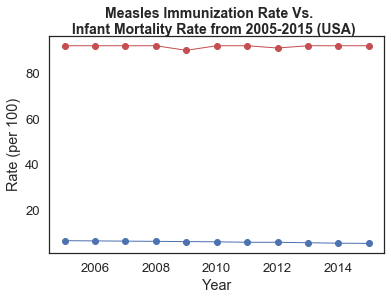

In [67]:
# Plotting Immunization vs Infant Mortality (USA)

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle('Measles Immunization Rate Vs. \n Infant Mortality Rate from 2005-2015 (USA)', fontsize=14, fontweight="bold")

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

x = yr_list
y = [ x[0] for x in decade_health_USA_T_codes[['SP.DYN.IMRT.IN']].values]

ax1.set_xlim(min(yr_list)-.5, max(yr_list)+.5)
ax1.plot(x, y, linewidth=1, marker="o")

x = yr_list
y = [ x[0] for x in decade_health_USA_T_codes[['SH.IMM.MEAS']].values]

ax1.plot(x, y, linewidth=1, marker="o", color="r")
ax1.set_ylabel("Rate (per 100)")
ax1.set_xlabel("Year")

plt.savefig("measles_usa.png")

In [68]:
# Calculating r value for Immunization vs Infant Mortality (USA)

import pingouin as pg

x = [ x[0] for x in decade_health_USA_T_codes[['SP.DYN.IMRT.IN']].values]
y = [ x[0] for x in decade_health_USA_T_codes[['SH.IMM.MEAS']].values]

print(pg.corr(x, y))

          n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  11 -0.063  [-0.64, 0.56]  0.004  -0.245  0.853729  0.375  0.053


          n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  11  0.151  [-0.49, 0.69]  0.023  -0.222  0.658471  0.403  0.072


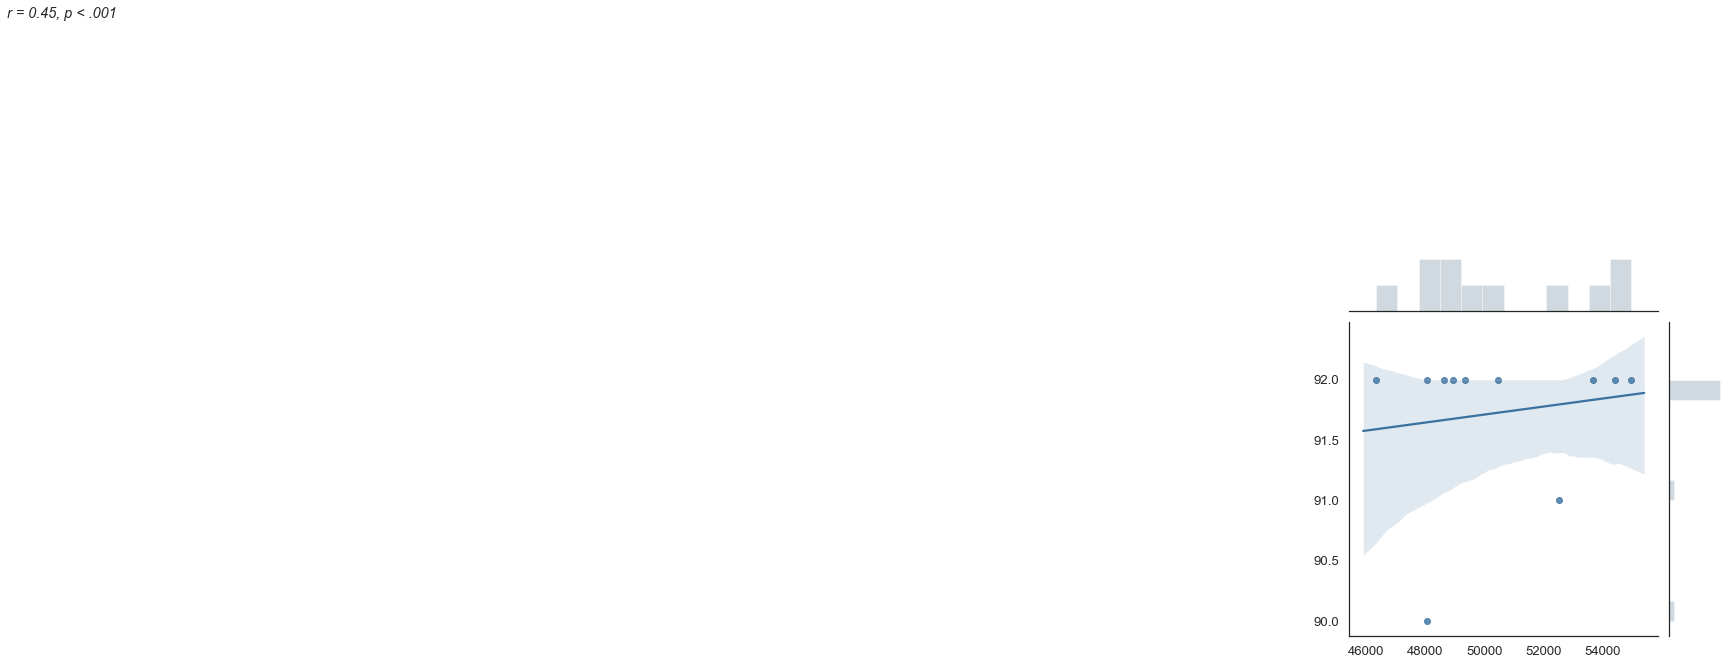

In [69]:
# Calculating r value and plotting graphs for GNP vs Infant Mortality (USA)

sns.set(style='white', font_scale=1.2)

x = [ x[0] for x in decade_health_USA_T_codes[['NY.GNP.PCAP.CD']].values]
y = [ x[0] for x in decade_health_USA_T_codes[['SH.IMM.MEAS']].values]

print(pg.corr(x, y))

g = sns.JointGrid(x, y)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(150, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

plt.savefig("gnp_usa.png")

          n      r         CI95%     r2  adj_r2    p-val    BF10  power
pearson  11  0.856  [0.53, 0.96]  0.733   0.666  0.00077  51.717  0.961


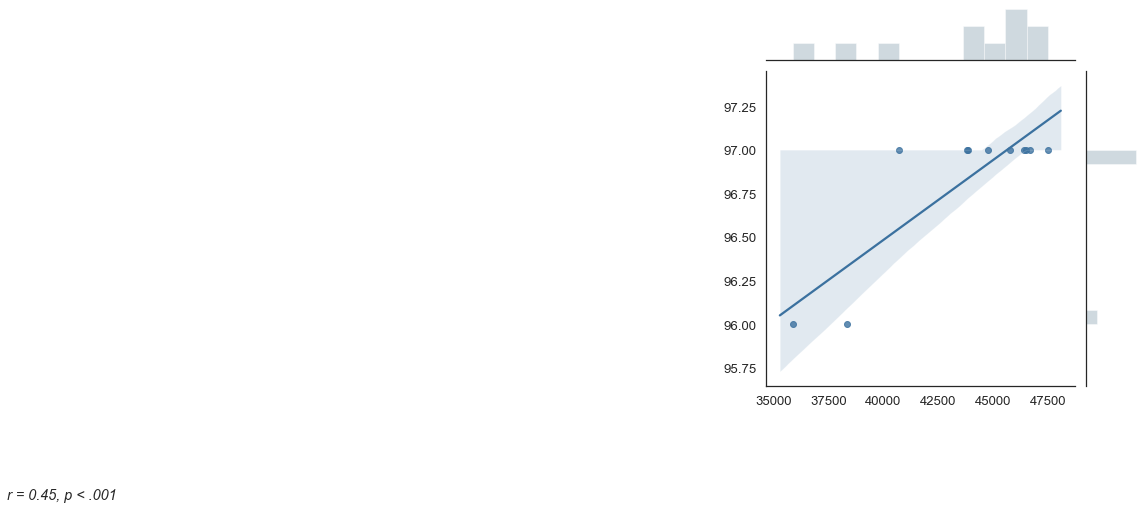

In [70]:

sns.set(style='white', font_scale=1.2)

x = [ x[0] for x in decade_health_germany_T_codes[['NY.GNP.PCAP.CD']].values]
y = [ x[0] for x in decade_health_germany_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

g = sns.JointGrid(x, y)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(150, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

plt.savefig("gnp_germany.png")

          n      r         CI95%    r2  adj_r2     p-val   BF10  power
pearson  11  0.721  [0.21, 0.92]  0.52     0.4  0.012296  5.933   0.76


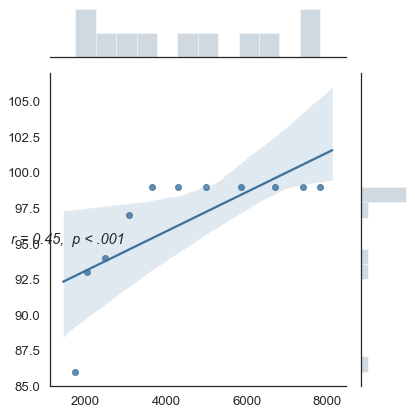

In [71]:

sns.set(style='white', font_scale=1.2)

x = [ x[0] for x in decade_health_china_T_codes[['NY.GNP.PCAP.CD']].values]
y = [ x[0] for x in decade_health_china_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

g = sns.JointGrid(x, y)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(150, 95,'r = 0.45,  p < .001', fontstyle='italic')
plt.tight_layout()

plt.savefig("gnp_china.png")

          n     r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  11  0.54  [-0.09, 0.86]  0.292   0.115  0.086195  1.379  0.427


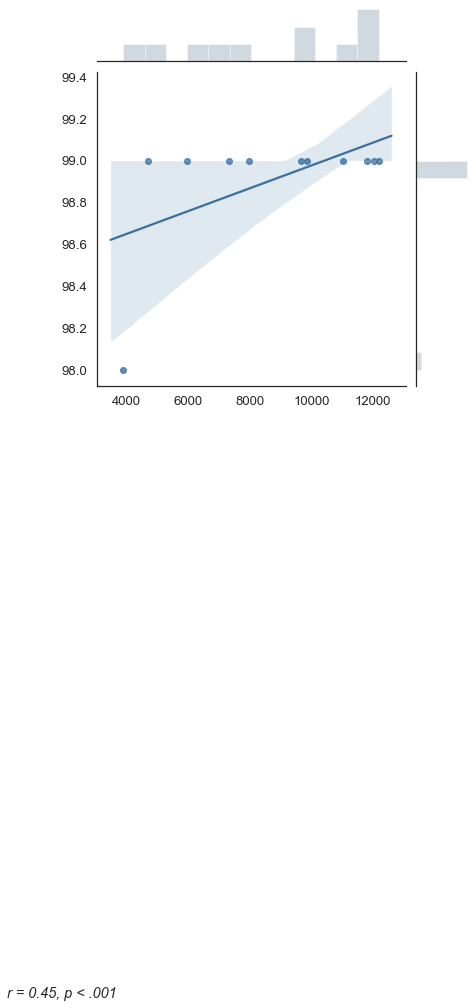

In [72]:

sns.set(style='white', font_scale=1.2)

x = [ x[0] for x in decade_health_brazil_T_codes[['NY.GNP.PCAP.CD']].values]
y = [ x[0] for x in decade_health_brazil_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

g = sns.JointGrid(x, y)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(150, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

plt.savefig("gnp_brazil.png")

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[93.0, 93.0, 93.0, 94.0, 92.0, 92.0, 91.0, 90.0, 91.0, 92.0, 92.0]
r-squared: 0.4056338028169015
[93.18181818181819, 92.9636363636364, 92.74545454545455, 92.52727272727276, 92.30909090909091, 92.09090909090912, 91.87272727272727, 91.65454545454548, 91.43636363636364, 91.21818181818185, 91.0]
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[92.0, 92.0, 92.0, 92.0, 90.0, 92.0, 92.0, 91.0, 92.0, 92.0, 92.0]
r-squared: 0.0
[91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273, 91.72727272727273]


Text(0.5, 0, 'Year')

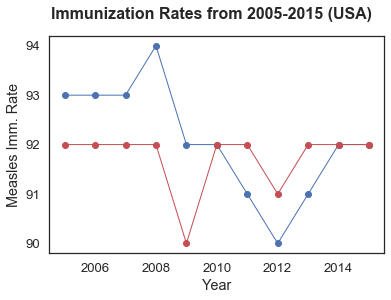

In [73]:


fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Immunization Rates from 2005-2015 (USA)", fontsize=16, fontweight="bold")

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

x = yr_list
y = [ x[0] for x in decade_health_USA_T_codes[['SH.IMM.HEPB']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.set_xlim(min(yr_list)-.5, max(yr_list)+.5)
ax1.plot(x, y, linewidth=1, marker="o")




x = yr_list
y = [ x[0] for x in decade_health_USA_T_codes[['SH.IMM.MEAS']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.plot(x, y, linewidth=1, marker="o", color="r")
ax1.set_ylabel("Measles Imm. Rate")
ax1.set_xlabel("Year")

In [74]:
germany_df = countries_sorted_df.get_group('Germany')
germany_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
38985,Germany,DEU,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38986,Germany,DEU,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38987,Germany,DEU,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,10.8106,10.2908,9.771,9.422,9.073,8.724,8.375,8.026,7.4932,6.9604,NaN
38988,Germany,DEU,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38989,Germany,DEU,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39325,Germany,DEU,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39326,Germany,DEU,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39327,Germany,DEU,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39328,Germany,DEU,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
dropped_germany_df = germany_df.dropna() 
dropped_germany_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
38994,Germany,DEU,Age dependency ratio (% of working-age populat...,SP.POP.DPND,4.954515e+01,5.010785e+01,5.067016e+01,5.117681e+01,5.155849e+01,5.180576e+01,5.182776e+01,5.173202e+01,5.162005e+01,5.162432e+01,5.180606e+01
38995,Germany,DEU,"Age dependency ratio, old",SP.POP.DPND.OL,2.814905e+01,2.896905e+01,2.971008e+01,3.034412e+01,3.086227e+01,3.127944e+01,3.152341e+01,3.165877e+01,3.176707e+01,3.194767e+01,3.224460e+01
38996,Germany,DEU,"Age dependency ratio, young",SP.POP.DPND.YG,2.139610e+01,2.113880e+01,2.096008e+01,2.083268e+01,2.069622e+01,2.052631e+01,2.030436e+01,2.007325e+01,1.985298e+01,1.967665e+01,1.956146e+01
38997,Germany,DEU,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,3.203470e+05,3.133480e+05,3.113140e+05,3.130590e+05,3.164950e+05,3.199700e+05,3.227330e+05,3.257430e+05,3.287660e+05,3.316640e+05,3.343770e+05
38998,Germany,DEU,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,3.384360e+05,3.310280e+05,3.289690e+05,3.309560e+05,3.347730e+05,3.387010e+05,3.415130e+05,3.446350e+05,3.478480e+05,3.509820e+05,3.538960e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39288,Germany,DEU,Rural population (% of total population),SP.RUR.TOTL.ZS,2.664500e+01,2.650600e+01,2.630500e+01,2.610500e+01,2.590700e+01,2.570900e+01,2.551200e+01,2.531200e+01,2.511000e+01,2.490600e+01,2.469900e+01
39289,Germany,DEU,Rural population growth (annual %),SP.RUR.TOTL.ZG,-3.041745e-01,-6.358351e-01,-8.949275e-01,-9.533581e-01,-1.014749e+00,-9.204074e-01,-7.438593e-01,-2.478383e+00,1.298915e+00,-2.226124e+00,-3.042279e-01
39320,Germany,DEU,Urban population,SP.URB.TOTL,6.049544e+07,6.054175e+07,6.062620e+07,6.067526e+07,6.068388e+07,6.075290e+07,6.092945e+07,6.006844e+07,6.150922e+07,6.081300e+07,6.130491e+07
39321,Germany,DEU,Urban population (% of total),SP.URB.TOTL.IN.ZS,7.335500e+01,7.349400e+01,7.369500e+01,7.389500e+01,7.409300e+01,7.429100e+01,7.448800e+01,7.468800e+01,7.489000e+01,7.509400e+01,7.530100e+01


In [76]:
decade_health_germany_T = dropped_germany_df.iloc[:, 2:].T
decade_health_germany_T.columns = decade_health_germany_T.iloc[1,:]
decade_health_germany_T = decade_health_germany_T.iloc[2:, :]
decade_health_germany_T

Indicator Code,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.AG00.FE.IN,SP.POP.AG00.MA.IN,SP.POP.AG01.FE.IN,SP.POP.AG01.MA.IN,SP.POP.AG02.FE.IN,SP.POP.AG02.MA.IN,SP.POP.AG03.FE.IN,...,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.RUR.TOTL.ZG,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW
2005,49.5452,28.1491,21.3961,320347,338436,335992,354956,348676,368345,358812,...,51.0324,4.03833e+07,48.9676,8.24694e+07,2.1974e+07,26.645,-0.304175,6.04954e+07,73.355,0.0332361
2006,50.1078,28.969,21.1388,313348,331028,323789,341784,337480,356247,348906,...,51.027,4.03422e+07,48.973,8.23765e+07,2.18347e+07,26.506,-0.635835,6.05417e+07,73.494,0.076512
2007,50.6702,29.7101,20.9601,311314,328969,325407,343600,327019,344945,338750,...,51.0244,4.02904e+07,48.9756,8.22664e+07,2.16402e+07,26.305,-0.894928,6.06262e+07,73.695,0.1394
2008,51.1768,30.3441,20.8327,313059,330956,322748,340754,331326,349512,330210,...,51.0216,4.02162e+07,48.9784,8.21101e+07,2.14348e+07,26.105,-0.953358,6.06753e+07,73.895,0.0808778
2009,51.5585,30.8623,20.6962,316495,334773,321514,339483,326750,344603,332188,...,51.0147,4.01201e+07,48.9853,8.19023e+07,2.12184e+07,25.907,-1.01475,6.06839e+07,74.093,0.0142058
2010,51.8058,31.2794,20.5263,319970,338701,321349,339477,323883,341679,327443,...,51.0012,4.00698e+07,48.9988,8.17769e+07,2.1024e+07,25.709,-0.920407,6.07529e+07,74.291,0.113677
2011,51.8278,31.5234,20.3044,322733,341513,321128,339528,322473,340381,324915,...,50.9795,4.00976e+07,49.0205,8.17977e+07,2.08682e+07,25.512,-0.743859,6.09295e+07,74.488,0.290185
2012,51.732,31.6588,20.0732,325743,344635,323302,341419,322483,340657,323792,...,50.951,3.94481e+07,49.049,8.04258e+07,2.03574e+07,25.312,-2.47838,6.00684e+07,74.688,-1.42321
2013,51.6201,31.7671,19.853,328766,347848,325590,343954,323986,341855,323871,...,50.9185,4.0312e+07,49.0815,8.21328e+07,2.06235e+07,25.11,1.29892,6.15092e+07,74.89,2.37025
2014,51.6243,31.9477,19.6767,331664,350982,328165,346857,325968,344204,324995,...,50.8862,3.97736e+07,49.1138,8.09825e+07,2.01695e+07,24.906,-2.22612,6.0813e+07,75.094,-1.13835


In [77]:
decade_health_germany_T_codes = decade_health_germany_T[['SH.IMM.HEPB', 'SH.IMM.MEAS', 'SH.STA.ACSN','SP.DYN.IMRT.IN','SH.H2O.SAFE.ZS','SP.POP.GROW','SP.POP.TOTL','NY.GNP.PCAP.CD']]
decade_health_germany_T_codes

Indicator Code,SH.IMM.HEPB,SH.IMM.MEAS,SH.STA.ACSN,SP.DYN.IMRT.IN,SH.H2O.SAFE.ZS,SP.POP.GROW,SP.POP.TOTL,NY.GNP.PCAP.CD
2005,90,96,99.2,3.9,100,-0.0567783,8.24694e+07,35880
2006,87,96,99.2,3.8,100,-0.112797,8.23765e+07,38370
2007,86,97,99.2,3.7,100,-0.133719,8.22664e+07,40700
2008,87,97,99.2,3.6,100,-0.190143,8.21101e+07,43870
2009,88,97,99.2,3.6,100,-0.253383,8.19023e+07,43810
2010,88,97,99.2,3.5,100,-0.153198,8.17769e+07,44790
2011,88,97,99.2,3.4,100,0.0253621,8.17977e+07,46480
2012,88,97,99.2,3.3,100,-1.69135,8.04258e+07,46680
2013,88,97,99.2,3.3,100,2.10016,8.21328e+07,46390
2014,88,97,99.2,3.2,100,-1.41038,8.09825e+07,47500


[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[39.0, 38.0, 37.0, 36.0, 36.0, 35.0, 34.0, 33.0, 33.0, 32.0, 31.0]
r-squared: 0.9882352941176468
[38.72727272727275, 37.9636363636364, 37.200000000000045, 36.436363636363694, 35.67272727272734, 34.90909090909099, 34.14545454545464, 33.38181818181829, 32.61818181818194, 31.854545454545587, 31.090909090909236]
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[96.0, 96.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0]
r-squared: 0.45
[96.40909090909088, 96.49090909090907, 96.57272727272726, 96.65454545454543, 96.73636363636362, 96.81818181818181, 96.89999999999998, 96.98181818181817, 97.06363636363633, 97.14545454545453, 97.22727272727272]


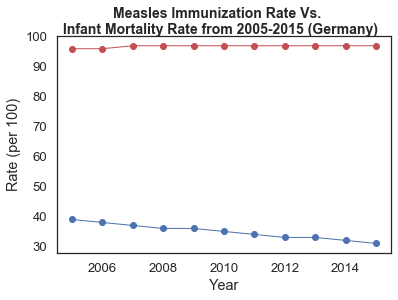

In [78]:
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle('Measles Immunization Rate Vs. \n Infant Mortality Rate from 2005-2015 (Germany)', fontsize=14, fontweight="bold")

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

x = yr_list
y = [ x[0] for x in decade_health_germany_T_codes[['SP.DYN.IMRT.IN']].values*10]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.set_xlim(min(yr_list)-.5, max(yr_list)+.5)
ax1.plot(x, y, linewidth=1, marker="o")

x = yr_list
y = [ x[0] for x in decade_health_germany_T_codes[['SH.IMM.MEAS']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.plot(x, y, linewidth=1, marker="o", color="r")
ax1.set_ylabel("Rate (per 100)")
ax1.set_xlabel("Year")

plt.savefig("measles_germany.png")

In [79]:

x = [ x[0] for x in decade_health_germany_T_codes[['SP.DYN.IMRT.IN']].values]
y = [ x[0] for x in decade_health_germany_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

          n      r           CI95%     r2  adj_r2     p-val  BF10  power
pearson  11 -0.697  [-0.91, -0.17]  0.486   0.357  0.017175  4.59  0.714


In [80]:
china_df = countries_sorted_df.get_group('China') 
china_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
28290,China,CHN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28291,China,CHN,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28292,China,CHN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,7.9722,7.9136,7.855,7.7882,7.7214,7.6546,7.5878,7.521,7.4344,7.3478,NaN
28293,China,CHN,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28294,China,CHN,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28630,China,CHN,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28631,China,CHN,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28632,China,CHN,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28633,China,CHN,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
dropped_china_df = china_df.dropna() 
dropped_china_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
28299,China,CHN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,3.808612e+01,3.704992e+01,3.607979e+01,3.528583e+01,3.475640e+01,3.451876e+01,3.449331e+01,3.473729e+01,3.521478e+01,3.584651e+01,3.657994e+01
28300,China,CHN,"Age dependency ratio, old",SP.POP.DPND.OL,1.034587e+01,1.046019e+01,1.057413e+01,1.070533e+01,1.087346e+01,1.109244e+01,1.135988e+01,1.166044e+01,1.201963e+01,1.247435e+01,1.304503e+01
28301,China,CHN,"Age dependency ratio, young",SP.POP.DPND.YG,2.774025e+01,2.658973e+01,2.550566e+01,2.458050e+01,2.388295e+01,2.342631e+01,2.313343e+01,2.307685e+01,2.319515e+01,2.337215e+01,2.353491e+01
28302,China,CHN,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,7.837159e+06,7.776430e+06,7.640523e+06,7.473984e+06,7.343106e+06,7.294571e+06,7.362075e+06,7.511228e+06,7.688517e+06,7.818200e+06,7.846614e+06
28303,China,CHN,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,9.112673e+06,9.078221e+06,8.943605e+06,8.760397e+06,8.606732e+06,8.538485e+06,8.592827e+06,8.731188e+06,8.897440e+06,9.011860e+06,9.017974e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593,China,CHN,Rural population (% of total population),SP.RUR.TOTL.ZS,5.747800e+01,5.613200e+01,5.480100e+01,5.346100e+01,5.212000e+01,5.077400e+01,4.942700e+01,4.811100e+01,4.683200e+01,4.559000e+01,4.438600e+01
28594,China,CHN,Rural population growth (annual %),SP.RUR.TOTL.ZG,-1.781027e+00,-1.811246e+00,-1.877490e+00,-1.963216e+00,-2.042985e+00,-2.133474e+00,-2.209608e+00,-2.211368e+00,-2.200701e+00,-2.181522e+00,-2.168292e+00
28625,China,CHN,Urban population,SP.URB.TOTL,5.543678e+08,5.751183e+08,5.956708e+08,6.164812e+08,6.374073e+08,6.584987e+08,6.797669e+08,7.008621e+08,7.216918e+08,7.422993e+08,7.625903e+08
28626,China,CHN,Urban population (% of total),SP.URB.TOTL.IN.ZS,4.252200e+01,4.386800e+01,4.519900e+01,4.653900e+01,4.788000e+01,4.922600e+01,5.057300e+01,5.188900e+01,5.316800e+01,5.441000e+01,5.561400e+01


In [82]:
decade_health_china_T = dropped_china_df.iloc[:, 2:].T
decade_health_china_T.columns = decade_health_china_T.iloc[1,:]
decade_health_china_T = decade_health_china_T.iloc[2:, :]
decade_health_china_T

Indicator Code,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.AG00.FE.IN,SP.POP.AG00.MA.IN,SP.POP.AG01.FE.IN,SP.POP.AG01.MA.IN,SP.POP.AG02.FE.IN,SP.POP.AG02.MA.IN,SP.POP.AG03.FE.IN,...,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.POP.TOTL,SN.ITK.DEFC.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.RUR.TOTL.ZG,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW
2005,38.0861,10.3459,27.7403,7.83716e+06,9.11267e+06,7.22655e+06,8.37974e+06,6.83062e+06,7.89552e+06,6.62881e+06,...,6.70443e+08,51.4254,1.30372e+09,15.6,7.49352e+08,57.478,-1.78103,5.54368e+08,42.522,3.88247
2006,37.0499,10.4602,26.5897,7.77643e+06,9.07822e+06,7.68536e+06,8.93352e+06,7.18193e+06,8.32629e+06,6.85322e+06,...,6.74337e+08,51.4361,1.31102e+09,15.3,7.35902e+08,56.132,-1.81125,5.75118e+08,43.868,3.67473
2007,36.0798,10.5741,25.5057,7.64052e+06,8.94360e+06,7.25883e+06,8.46336e+06,7.54177e+06,8.76452e+06,7.14491e+06,...,6.77997e+08,51.4459,1.31788e+09,14.8,7.22214e+08,54.801,-1.87749,5.95671e+08,45.199,3.51126
2008,35.2858,10.7053,24.5805,7.47398e+06,8.7604e+06,7.25846e+06,8.47842e+06,7.08364e+06,8.2481e+06,7.40078e+06,...,6.81603e+08,51.4552,1.32466e+09,14.1,7.08174e+08,53.461,-1.96322,6.16481e+08,46.539,3.43396
2009,34.7564,10.8735,23.8829,7.34311e+06,8.60673e+06,7.27522e+06,8.50554e+06,7.19635e+06,8.39358e+06,7.11525e+06,...,6.85127e+08,51.4646,1.33126e+09,13.3,6.93853e+08,52.12,-2.04299,6.37407e+08,47.88,3.3381
2010,34.5188,11.0924,23.4263,7.29457e+06,8.53848e+06,7.32577e+06,8.56296e+06,7.31054e+06,8.53316e+06,7.26129e+06,...,6.88576e+08,51.4745,1.33770e+09,12.5,6.79206e+08,50.774,-2.13347,6.58499e+08,49.226,3.25537
2011,34.4933,11.3599,23.1334,7.36208e+06,8.59283e+06,7.32971e+06,8.57475e+06,7.3349e+06,8.57225e+06,7.30354e+06,...,6.92024e+08,51.4849,1.34413e+09,11.7,6.64363e+08,49.427,-2.20961,6.79767e+08,50.573,3.17874
2012,34.7373,11.6604,23.0768,7.51123e+06,8.73119e+06,7.55236e+06,8.79457e+06,7.36088e+06,8.60684e+06,7.34002e+06,...,6.95548e+08,51.4956,1.3507e+09,11,6.49833e+08,48.111,-2.21137,7.00862e+08,51.889,3.05613
2013,35.2148,12.0196,23.1952,7.68852e+06,8.89744e+06,7.67637e+06,8.91361e+06,7.6255e+06,8.87686e+06,7.38891e+06,...,6.99131e+08,51.5059,1.35738e+09,10.4,6.35688e+08,46.832,-2.2007,7.21692e+08,53.168,2.9287
2014,35.8465,12.4744,23.3722,7.8182e+06,9.01186e+06,7.76448e+06,8.99061e+06,7.6878e+06,8.93325e+06,7.59394e+06,...,7.02805e+08,51.5151,1.36427e+09,9.8,6.21971e+08,45.59,-2.18152,7.42299e+08,54.41,2.81544


In [83]:
decade_health_china_T_codes = decade_health_china_T[['SH.IMM.HEPB', 'SH.IMM.MEAS', 'SH.STA.ACSN','SP.DYN.IMRT.IN','SH.H2O.SAFE.ZS','SP.POP.GROW','SP.POP.TOTL','NY.GNP.PCAP.CD']]
decade_health_china_T_codes

Indicator Code,SH.IMM.HEPB,SH.IMM.MEAS,SH.STA.ACSN,SP.DYN.IMRT.IN,SH.H2O.SAFE.ZS,SP.POP.GROW,SP.POP.TOTL,NY.GNP.PCAP.CD
2005,84,86,64.9,20.3,86.3,0.588125,1.30372e+09,1750
2006,91,93,66.1,18.7,87.4,0.558374,1.31102e+09,2050
2007,92,94,67.2,17.2,88.5,0.522272,1.31788e+09,2490
2008,95,97,68.4,15.8,89.5,0.512387,1.32466e+09,3070
2009,99,99,69.6,14.6,90.5,0.497381,1.33126e+09,3650
2010,99,99,70.8,13.5,91.4,0.48296,1.33770e+09,4300
2011,99,99,71.9,12.5,92.3,0.47915,1.34413e+09,5000
2012,99,99,73.1,11.5,93.2,0.487231,1.3507e+09,5870
2013,99,99,74.2,10.6,94,0.49371,1.35738e+09,6710
2014,99,99,75.4,9.8,94.8,0.506312,1.36427e+09,7400


In [84]:
decade_health_china_T_codes.iloc[:,1]

2005    86
2006    93
2007    94
2008    97
2009    99
2010    99
2011    99
2012    99
2013    99
2014    99
2015    99
Name: SH.IMM.MEAS, dtype: object

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[20.3, 18.7, 17.2, 15.8, 14.6, 13.5, 12.5, 11.5, 10.6, 9.8, 9.2]
r-squared: 0.9840518560913601
[19.5, 18.39454545454555, 17.2890909090911, 16.183636363636197, 15.078181818181747, 13.972727272727298, 12.867272727272848, 11.761818181818398, 10.656363636363494, 9.550909090909045, 8.445454545454595]
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[86.0, 93.0, 94.0, 97.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]
r-squared: 0.6145416227608009
[91.72727272727275, 92.70909090909095, 93.69090909090914, 94.67272727272734, 95.65454545454554, 96.63636363636374, 97.61818181818194, 98.60000000000014, 99.58181818181833, 100.5636363636363, 101.5454545454545]


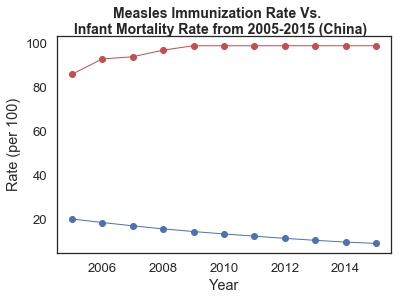

In [85]:

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle('Measles Immunization Rate Vs. \n Infant Mortality Rate from 2005-2015 (China)', fontsize=14, fontweight="bold")

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

x = yr_list
y = [ x[0] for x in decade_health_china_T_codes[['SP.DYN.IMRT.IN']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.set_xlim(min(yr_list)-.5, max(yr_list)+.5)
ax1.plot(x, y, linewidth=1, marker="o")

x = yr_list
y = [ x[0] for x in decade_health_china_T_codes[['SH.IMM.MEAS']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.plot(x, y, linewidth=1, marker="o", color="r")
ax1.set_ylabel("Rate (per 100)")
ax1.set_xlabel("Year")

plt.savefig("measles_china.png")

In [86]:

x = [ x[0] for x in decade_health_china_T_codes[['SP.DYN.IMRT.IN']].values]
y = [ x[0] for x in decade_health_china_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

          n      r           CI95%     r2  adj_r2     p-val    BF10  power
pearson  11 -0.849  [-0.96, -0.51]  0.722   0.652  0.000935  44.367  0.955


In [87]:
brazil_df = countries_sorted_df.get_group('Brazil') 
brazil_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23115,Brazil,BRA,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23116,Brazil,BRA,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23117,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,74.907400,72.894200,70.881000,70.393800,69.906600,69.419400,68.932200,68.445000,67.877800,67.310600,NaN
23118,Brazil,BRA,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,580000.000000,600000.000000,630000.000000,650000.000000,680000.000000,700000.000000,730000.000000,750000.000000,780000.000000,800000.000000,830000.00000
23119,Brazil,BRA,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,42000.000000,42000.000000,42000.000000,42000.000000,43000.000000,43000.000000,43000.000000,43000.000000,44000.000000,44000.000000,44000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23455,Brazil,BRA,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23456,Brazil,BRA,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23457,Brazil,BRA,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23458,Brazil,BRA,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
dropped_brazil_df = brazil_df.dropna() 
dropped_brazil_df

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23118,Brazil,BRA,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,5.800000e+05,6.000000e+05,6.300000e+05,6.500000e+05,6.800000e+05,7.000000e+05,7.300000e+05,7.500000e+05,7.800000e+05,8.000000e+05,8.300000e+05
23119,Brazil,BRA,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.300000e+04,4.300000e+04,4.300000e+04,4.300000e+04,4.400000e+04,4.400000e+04,4.400000e+04
23120,Brazil,BRA,Adults (ages 15+) living with HIV,SH.DYN.AIDS,5.600000e+05,5.900000e+05,6.100000e+05,6.400000e+05,6.700000e+05,6.900000e+05,7.200000e+05,7.400000e+05,7.700000e+05,7.900000e+05,8.200000e+05
23121,Brazil,BRA,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,4.000000e+04,4.100000e+04,4.100000e+04,4.100000e+04,4.200000e+04,4.200000e+04,4.300000e+04,4.300000e+04,4.300000e+04,4.300000e+04,4.400000e+04
23124,Brazil,BRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,5.009620e+01,4.953193e+01,4.893350e+01,4.832347e+01,4.773305e+01,4.718367e+01,4.650426e+01,4.599790e+01,4.557853e+01,4.514289e+01,4.465985e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23419,Brazil,BRA,Rural population growth (annual %),SP.RUR.TOTL.ZG,-5.453702e-01,-6.460267e-01,-7.378238e-01,-8.107786e-01,-8.450996e-01,-8.728030e-01,-9.018391e-01,-8.892559e-01,-8.906910e-01,-8.962439e-01,-9.039928e-01
23450,Brazil,BRA,Urban population,SP.URB.TOTL,1.561249e+08,1.585522e+08,1.608748e+08,1.631177e+08,1.653156e+08,1.675013e+08,1.696840e+08,1.718410e+08,1.739698e+08,1.760585e+08,1.780983e+08
23451,Brazil,BRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,8.283400e+01,8.314300e+01,8.344800e+01,8.374900e+01,8.404400e+01,8.433500e+01,8.462300e+01,8.490100e+01,8.517100e+01,8.543300e+01,8.568700e+01
23452,Brazil,BRA,Urban population growth (annual %),SP.URB.GROW,1.640158e+00,1.542783e+00,1.454247e+00,1.384527e+00,1.338475e+00,1.313445e+00,1.294679e+00,1.263160e+00,1.231201e+00,1.193505e+00,1.151920e+00


In [89]:
decade_health_brazil_T = dropped_brazil_df.iloc[:, 2:].T
decade_health_brazil_T.columns = decade_health_brazil_T.iloc[1,:]
decade_health_brazil_T = decade_health_brazil_T.iloc[2:, :]
decade_health_brazil_T

Indicator Code,SH.HIV.TOTL,SH.HIV.INCD.TL,SH.DYN.AIDS,SH.HIV.INCD,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.AG00.FE.IN,SP.POP.AG00.MA.IN,SP.POP.AG01.FE.IN,...,SH.HIV.1524.MA.ZS,SH.DYN.AIDS.ZS,SN.ITK.DEFC.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.RUR.TOTL.ZG,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SH.DYN.AIDS.FE.ZS
2005,580000,42000,560000,40000,50.0962,8.79258,41.3036,1.65804e+06,1.73041e+06,1.70008e+06,...,0.2,0.5,5,3.23543e+07,17.166,-0.54537,1.56125e+08,82.834,1.64016,37.4179
2006,600000,42000,590000,41000,49.5319,8.99175,40.5402,1.59204e+06,1.66169e+06,1.66076e+06,...,0.3,0.5,5,3.2146e+07,16.857,-0.646027,1.58552e+08,83.143,1.54278,37.2969
2007,630000,42000,610000,41000,48.9335,9.18458,39.7489,1.51798e+06,1.58433e+06,1.59772e+06,...,0.3,0.5,5,3.19097e+07,16.552,-0.737824,1.60875e+08,83.448,1.45425,37.1525
2008,650000,42000,640000,41000,48.3235,9.38059,38.9429,1.44741e+06,1.51045e+06,1.53863e+06,...,0.3,0.5,5,3.1652e+07,16.251,-0.810779,1.63118e+08,83.749,1.38453,36.9881
2009,680000,43000,670000,42000,47.7331,9.592,38.141,1.39546e+06,1.45593e+06,1.48858e+06,...,0.3,0.5,5,3.13857e+07,15.956,-0.8451,1.65316e+08,84.044,1.33847,36.8067
2010,700000,43000,690000,42000,47.1837,9.82622,37.3575,1.37205e+06,1.43125e+06,1.45553e+06,...,0.3,0.5,5,3.11129e+07,15.665,-0.872803,1.67501e+08,84.335,1.31345,36.6108
2011,730000,43000,720000,43000,46.5043,10.0884,36.4159,1.38640e+06,1.44612e+06,1.38809e+06,...,0.3,0.5,5,3.08336e+07,15.377,-0.901839,1.69684e+08,84.623,1.29468,36.4027
2012,750000,43000,740000,43000,45.9979,10.3684,35.6295,1.42944e+06,1.49088e+06,1.45352e+06,...,0.3,0.6,5,3.05606e+07,15.099,-0.889256,1.71841e+08,84.901,1.26316,36.184
2013,780000,44000,770000,43000,45.5785,10.6694,34.9091,1.48558e+06,1.54941e+06,1.47019e+06,...,0.3,0.6,5,3.02896e+07,14.829,-0.890691,1.7397e+08,85.171,1.2312,35.9836
2014,800000,44000,790000,43000,45.1429,10.995,34.1478,1.5326e+06,1.59864e+06,1.48553e+06,...,0.3,0.6,5,3.00194e+07,14.567,-0.896244,1.76059e+08,85.433,1.1935,35.8024


In [90]:
decade_health_brazil_T_codes = decade_health_brazil_T[['SH.IMM.HEPB', 'SH.IMM.MEAS', 'SH.STA.ACSN','SP.DYN.IMRT.IN','SH.H2O.SAFE.ZS','SP.POP.GROW','SP.POP.TOTL','NY.GNP.PCAP.CD']]
decade_health_brazil_T_codes

Indicator Code,SH.IMM.HEPB,SH.IMM.MEAS,SH.STA.ACSN,SP.DYN.IMRT.IN,SH.H2O.SAFE.ZS,SP.POP.GROW,SP.POP.TOTL,NY.GNP.PCAP.CD
2005,98,98,77.7,19.5,95.2,1.26158,1.88479e+08,3910
2006,99,99,78.2,18.2,95.6,1.17044,1.90698e+08,4710
2007,99,99,78.8,17.1,95.9,1.08808,1.92785e+08,5980
2008,96,99,79.4,16.2,96.2,1.02447,1.9477e+08,7330
2009,99,99,79.9,15.4,96.5,0.986851,1.96701e+08,7990
2010,96,99,80.5,14.8,96.9,0.967797,1.98614e+08,9650
2011,98,99,81.1,14.4,97.2,0.953765,2.00518e+08,11010
2012,96,99,81.6,14.3,97.5,0.935182,2.02402e+08,12020
2013,96,99,82.1,14.3,97.8,0.913688,2.04259e+08,12180
2014,96,99,82.7,14.4,98.1,0.88636,2.06078e+08,11790


[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[19.5, 18.2, 17.1, 16.2, 15.4, 14.8, 14.4, 14.3, 14.3, 14.4, 14.6]
r-squared: 0.7879293839396331
[18.149999999999977, 17.669090909090983, 17.188181818181874, 16.707272727272766, 16.226363636363658, 15.74545454545455, 15.264545454545441, 14.783636363636447, 14.302727272727338, 13.82181818181823, 13.340909090909122]
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[98.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]
r-squared: 0.2500000000000002
[98.68181818181819, 98.72727272727273, 98.77272727272728, 98.81818181818183, 98.86363636363637, 98.9090909090909, 98.95454545454545, 99.0, 99.04545454545455, 99.0909090909091, 99.13636363636364]


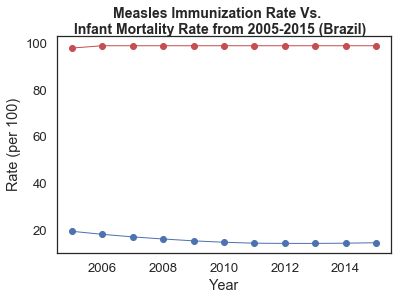

In [91]:

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle('Measles Immunization Rate Vs. \n Infant Mortality Rate from 2005-2015 (Brazil)', fontsize=14, fontweight="bold")

yr_list= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015]

x = yr_list
y = [ x[0] for x in decade_health_brazil_T_codes[['SP.DYN.IMRT.IN']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.set_xlim(min(yr_list)-.5, max(yr_list)+.5)
ax1.plot(x, y, linewidth=1, marker="o")

x = yr_list
y = [ x[0] for x in decade_health_brazil_T_codes[['SH.IMM.MEAS']].values]

print(x)
print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
values = [intercept + slope * data for data in x]
print('r-squared:', r_value**2)

print(values)

ax1.plot(x, y, linewidth=1, marker="o", color="r")
ax1.set_ylabel("Rate (per 100)")
ax1.set_xlabel("Year")

plt.savefig("measles_brazil.png")

In [92]:

x = [ x[0] for x in decade_health_brazil_T_codes[['SP.DYN.IMRT.IN']].values]
y = [ x[0] for x in decade_health_brazil_T_codes[['SH.IMM.MEAS']].values]
print(pg.corr(x, y))

          n      r           CI95%    r2  adj_r2     p-val   BF10  power
pearson  11 -0.693  [-0.91, -0.16]  0.48    0.35  0.018066  4.416  0.706
